<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---
- The global used cars market was valued at  828.24 billion  in 2019, and is projected to reach $ 1,355.15 billion by 2027, registering a CAGR of 8.3% from 2020 to 2027.

- A used car is the second-hand vehicle that is available for resale. Various outlets such as franchise and independent car dealers, rental car companies, auctions, private party sales, and leasing sell used cars. 

- There is a lower rate of car ownership among millennials owing to high cost of vehicles and maintenance cost of personal car. In addition, millennials are inclined toward cutting costs on cars, and thus majorly opt for used cars to travel. In addition, a lot of people are not able to buy new cars due to high cost, which boosts the sales of the used cars in the market. This also makes way for different investments by industry participants to establish their dealership network in the market.

---
<a name = Section2></a>
# **2. Problem Statement**
---

  - In the past few years, prices of new cars have skyrocketed, due to which most people are incapable of buying a new one.

  - Customers buying a new car always looks for assurity of their money to be worthy.

  - But due to the increased price of new cars, used car sales are on a global increase.

  - There is a need to effectively determine on what factors  to be consider while selecting used Cars to get more resale value if sold again.

  <p align="center"><img src="https://mystrongad.com/SYT_ToyotaofDekalb/Used/Used-Car-Toyota.png"></p>


---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---



### **Installing Libraries**

In [42]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

### **Upgrading Libraries**



In [43]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**



In [44]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
**Context**
---
This dataset conatins one of Used car company sale. Sales history from 1950 till 2016.
This dataset contains data for more than 9.5K cars sale. 
Dataset contains 9576 rows and 10 variables:



|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine volume in CC (cubic cm) |
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Type Front, Rear etc|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [45]:
cardata = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print(cardata.shape)
cardata.head()

(9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.00000,crossover,68,2.50000,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.00000,sedan,173,1.80000,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.00000,other,135,5.50000,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.00000,van,162,1.80000,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.00000,vagon,91,nan,Other,yes,2013,E-Class,NaN


### **Data Description**



In [46]:
cardata.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.00000,9576,9576.00000,9142.00000,9576,9576,9576.00000,9576,9065
unique,87,nan,6,nan,nan,4,2,nan,888,3
top,Volkswagen,nan,sedan,nan,nan,Petrol,yes,nan,E-Class,front
freq,936,nan,3646,nan,nan,4379,9015,nan,199,5188
mean,NaN,15633.31732,NaN,138.86236,2.64634,NaN,NaN,2006.60599,NaN,NaN
std,NaN,24106.52344,NaN,98.62975,5.92770,NaN,NaN,7.06792,NaN,NaN
min,NaN,0.00000,NaN,0.00000,0.10000,NaN,NaN,1953.00000,NaN,NaN
25%,NaN,4999.00000,NaN,70.00000,1.60000,NaN,NaN,2004.00000,NaN,NaN
50%,NaN,9200.00000,NaN,128.00000,2.00000,NaN,NaN,2008.00000,NaN,NaN
75%,NaN,16700.00000,NaN,194.00000,2.50000,NaN,NaN,2012.00000,NaN,NaN


### **Data Information**

In [47]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- We will first __understand our dataset__ using various pandas functionalities.
- Then we will do __pandas profiling__ to find out which columns of our dataset need preprocessing.
- In preprocessing we will deal with __zero and missing values__ columns.
- again we will do __pandas profiling__ to see how preprocessing have transformed our dataset

### 5.1 Rename Columns name.


In [48]:
cardata.rename(columns={'car':'brand','year':'Purchase_year'},inplace=True)           # Rename some columns name, to get meaningful information
cardata.shape

(9576, 10)

### 5.2 Genrate Pre-Profilling Report 


In [49]:
profile = ProfileReport(df = cardata)
profile.to_file(output_file = 'cardata_before_preprocessing.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

**Observations: As per Pre-processing Report**

There are 10 features with 9576 observations in the dataset.

**945 (1.0 %) cells** have missing values.

Most of the missing values are from the drive feature and the rest belong to the engV feature.

drive feature has **511 missing cells.**

engV feature has **434 missing cells.**

Dataset has **87 duplicate rows**.

Price and  Purchase Year are highly correlated to each other.

Milage and Price are highly correlated to each other.

price has **267  zero Values** and mileage has **348 zero Values**

Sedan is most popular **38.1%  follwed by crossover 21.6 %** in body type

Petrol is more popular **45.7%  follwed by disel 35.15%** fuel type

front wheel drive more prferable **54.2%** followed by full drive **26.1%** in drive type

### 6.1 Removing 87 Duplicates Rows 


In [50]:
cardata.drop_duplicates(inplace=True)       # Removing duplicate rows
cardata.shape


(9463, 10)

### 6.3 Find Mode of Drive as 511 missing  categorical data to be replced Mode front

In [51]:
cardata['drive'].mode()
print(cardata['drive'].mode())
cardata['drive'] = cardata['drive'].replace(np.nan, cardata['drive'].mode()[0])

0    front
dtype: object


### 6.4 Find Median for engV colum as 434 missing value for numerical data to be replace with median 2

In [52]:
cardata['engV'].median()
print(cardata['engV'].median())
cardata['engV'] = cardata['engV'].replace(np.nan, cardata['engV'].median())

2.0


### 6.5 Find Median for price colum as 267  zero values to be replced by median 9200

In [53]:
cardata['price'].median()
print(cardata['price'].median())
cardata['price'] = cardata['price'].replace(0,np.NaN)
cardata['price'] = cardata['price'].replace(np.nan, cardata['price'].median())

9200.0


### 6.6 Find Median for mileage colum as 348  zero values to be replced by median 129

In [54]:
cardata['mileage'].median()
print(cardata['mileage'].median())
cardata['mileage'] = cardata['mileage'].replace(0,np.NaN)
cardata['mileage'] = cardata['mileage'].replace(np.nan, cardata['mileage'].median())

129.0


### 6.7 check for null value

In [55]:
cardata.isnull().sum()

brand            0
price            0
body             0
mileage          0
engV             0
engType          0
registration     0
Purchase_year    0
model            0
drive            0
dtype: int64

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- Data set has no missing values

- Run for post profilling to do Granuel Analysis

In [56]:
profile = ProfileReport(df = cardata)
profile.to_file(output_file = "cardata_after_preprocessing.html")
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


### 7.1 Check data after post processing

In [57]:
cardata.describe(include='all')

,brand,price,body,mileage,engV,engType,registration,Purchase_year,model,drive
count,9463,9463.00000,9463,9463.00000,9463.00000,9463,9463,9463.00000,9463,9463
unique,87,nan,6,nan,nan,4,2,nan,888,3
top,Volkswagen,nan,sedan,nan,nan,Petrol,yes,nan,E-Class,front
freq,927,nan,3622,nan,nan,4341,8902,nan,192,5681
mean,NaN,15544.79729,NaN,144.21610,2.61203,NaN,NaN,2006.52584,NaN,NaN
std,NaN,22945.55963,NaN,95.06995,5.82620,NaN,NaN,7.06258,NaN,NaN
min,NaN,259.35000,NaN,1.00000,0.10000,NaN,NaN,1953.00000,NaN,NaN
25%,NaN,5500.00000,NaN,80.00000,1.60000,NaN,NaN,2004.00000,NaN,NaN
50%,NaN,9500.00000,NaN,131.00000,2.00000,NaN,NaN,2008.00000,NaN,NaN
75%,NaN,16500.00000,NaN,195.00000,2.50000,NaN,NaN,2012.00000,NaN,NaN


We have processed the data and now the dataset does not contain any missing values. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. 
observations:

- In the Dataset info, __Total Missing(%) = 0.0%__
- Number of variables = 9

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

# **Share of cars sold with feature**

Text(0.5, 1.0, 'Share of cars sold with feature')

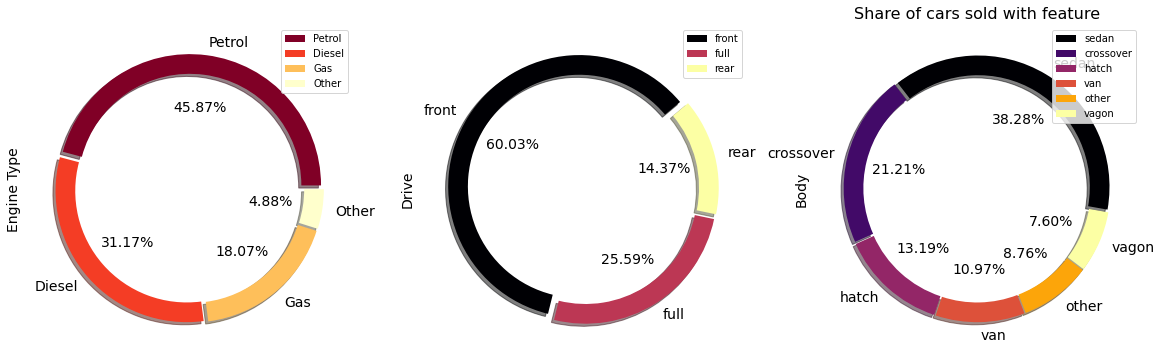

In [58]:
figure = plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
cardata['engType'].value_counts().plot(kind='pie',explode=np.ones(4)/40, fontsize=14
                                    ,autopct='%3.2f%%',wedgeprops=dict(width=0.15)
                                    ,shadow=True,startangle=0,cmap='YlOrRd_r',legend=True)
plt.ylabel(ylabel='Engine Type', size=14)

plt.subplot(1,3,2)
cardata['drive'].value_counts().plot(kind='pie',explode=np.ones(3)/30, fontsize=14
                                    ,autopct='%3.2f%%',wedgeprops=dict(width=0.15)
                                    ,shadow=True,startangle=40,cmap='inferno',legend=True)
plt.ylabel(ylabel='Drive', size=14)

plt.subplot(1,3,3)
cardata['body'].value_counts().plot(kind='pie',explode=np.ones(6)/60, fontsize=14
                                    ,autopct='%3.2f%%',wedgeprops=dict(width=0.15)
                                    ,shadow=True,startangle=-10,cmap='inferno',legend=True)
plt.ylabel(ylabel='Body', size=14)
plt.title(label='Share of cars sold with feature', size=16)

Sedan is most popular **38.2%** followed by crossover **21.2 %** in body type

Petrol is more popular **45.87%** followed by disel **31.17% fuel type**

front wheel drive more preferable **60.03%**  followed by **full drive 25.59%** in drive type

# **Find the Data distribution against drive**

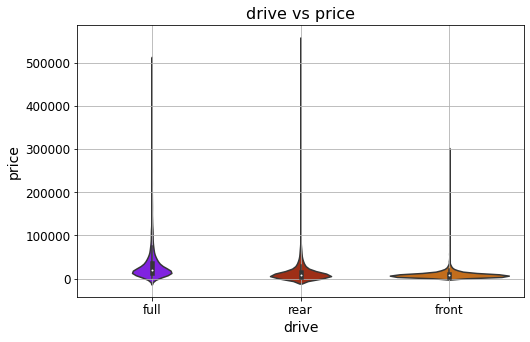

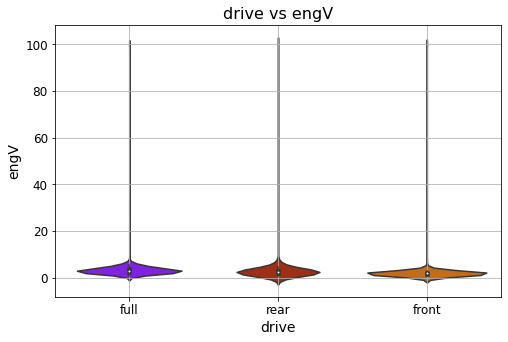

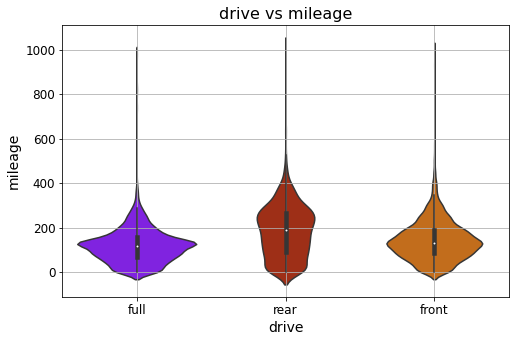

In [59]:
figure = plt.figure(figsize=[8, 5])
# Plot the coutplot figure concerning drive and price

sns.violinplot(x="drive", y="price", palette="gnuplot", data=cardata)

plt.title(label='drive vs price', size=16)
plt.xlabel(xlabel="drive", size=14)
plt.ylabel(ylabel="price", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.show()

figure = plt.figure(figsize=[8, 5])

# Plot the coutplot figure concerning drive and engV
sns.violinplot(x="drive", y="engV", palette="gnuplot", data=cardata)

plt.title(label='drive vs engV', size=16)
plt.xlabel(xlabel="drive", size=14)
plt.ylabel(ylabel="engV", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.show()

figure = plt.figure(figsize=[8, 5])

# Plot the coutplot figure concerning drive and engV
sns.violinplot(x="drive", y="mileage", palette="gnuplot", data=cardata)

plt.title(label='drive vs mileage', size=16)
plt.xlabel(xlabel="drive", size=14)
plt.ylabel(ylabel="mileage", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.show()

From Above Graph Car "Price" has outliers above Price 115000 USD.
Similary "engV" has outlier above 10 Liter engine.
Similary "mileage" has Outliers above 600 Mpg

### Q 1. Which brand of cars sold the most ?

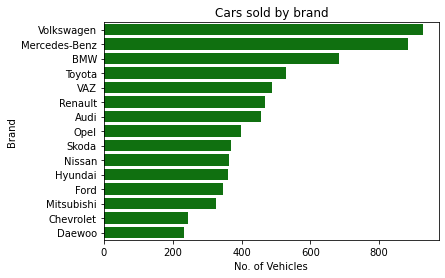

In [60]:
# top 30 brands which cars sold the most
sns.countplot(y = 'brand', data = cardata,color='green', order = cardata['brand'].value_counts().nlargest(15).index)
plt.title("Cars sold by brand")
plt.ylabel('Brand')
plt.xlabel('No. of Vehicles');
plt.show()

By this chart we can say that the most cars sold by the company __Volkswagen__ followed by __Mercedes-Benz__ and __BMW__.

### Q 2. Which body segment of cars sold the most ?

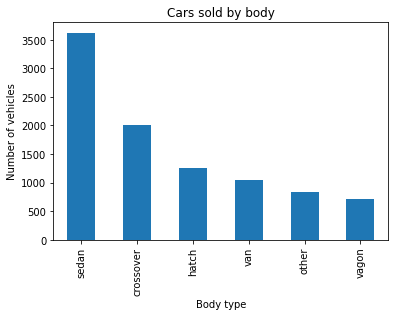

In [61]:
cardata['body'].value_counts().plot.bar()                      # Bar chart for car 'body' variable
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');

This chart says that __"Sedan"__ body type cars are the most sold cars, if we want to see it in terms of %, then we can see it in below chart. We can say this in other terms that the most preferred choice for people is __Sedan__, because it is the perfect and comfortable car for small size family within lower budget.

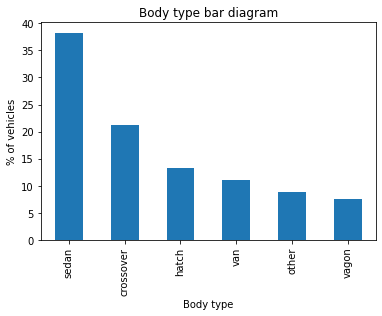

In [62]:
(cardata['body'].value_counts() / len(cardata)*100).plot.bar()                # Bar chart of car 'body in terms of %'
plt.title("Body type bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Body type');

Now we can say that approx 38% of total cars sold in __Sedan__ body type, 21% in __Crossover__ body type and 13% in __Hatch__ body type.

### Q 3. Which drive segment of cars in which body type sold the most ?

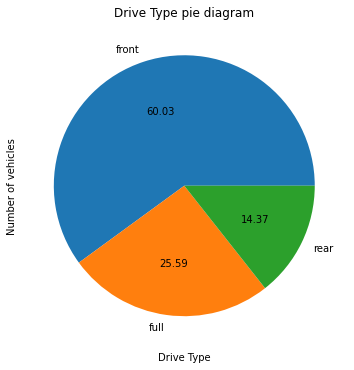

In [63]:
# Pie chart of car 'drive' type
cardata['drive'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Drive Type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive Type');

We can say that the most sold cars in __front__ drive type, in terms of percentage we can say that, approx 60% of total cars sold in __front__ drive type, 25% in __full__ drive type and 14% in __rear__ drive type.

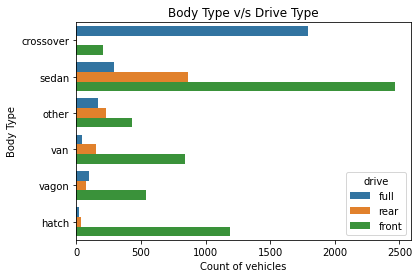

In [64]:
# Body type and Drive type analysis
sns.countplot(y='body',data=cardata, hue='drive')
plt.title("Body Type v/s Drive Type")
plt.ylabel('Body Type')
plt.xlabel('Count of vehicles');

- __"Front"__ wheel drive cars are the top most cars in all body type except in __"Crossover"__ body type. 
- In __"Crossover"__ body type __"Full"__ wheel drive cars are leading.   

### Q 4. Which price segment cars sold the most ?

In [65]:
cardata['price'].min()                           # minimum price

259.35

In [66]:
cardata['price'].max()                           # maximum price

547800.0

This dataset has minimum price of car as __259.35__ and maximum price as __547800__, so we can create a new field __price_group__ and update it with 5 to 6 price groups

In [67]:
# Create a new column 'price_group' and assign the value based on car price
cardata['price_group'] = pd.cut(cardata['price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
cardata['price_group'] = cardata['price_group'].astype(object)

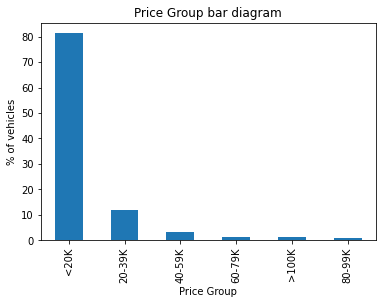

In [68]:
(cardata['price_group'].value_counts() / len(cardata) *100).plot.bar()
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

By this chart we can say that approx __80%__ of cars sold in the __price range of less than or equal to $ 20000__

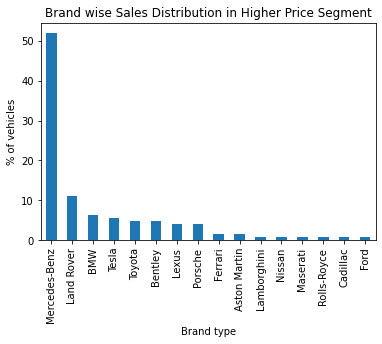

In [69]:
# Brand wise car sale in higher price segment
carprc = cardata.loc[cardata['price'] >= 100000]
(carprc['brand'].value_counts() / len(carprc)*100).plot.bar()                # Bar chart of car 'body in terms of %'
plt.title("Brand wise Sales Distribution in Higher Price Segment")
plt.ylabel('% of vehicles')
plt.xlabel('Brand type');

__"Mercedes-Benz"__ is the leading brand in higher price segment cars

### Q 5. How does price relate to body and drive type of car? 

- __price group__ v/s __body type__

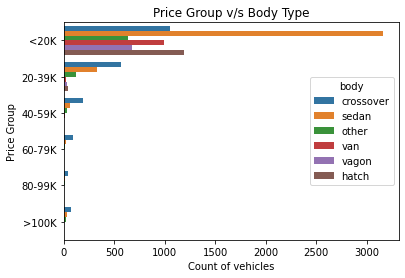

In [70]:
# body type v/s price group
sns.countplot(y='price_group',data=cardata, hue='body', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])           
plt.title("Price Group v/s Body Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

By this chart we can say that
- The most cars sold in price range of __200 to 19999__ and majority of these are in __Sedan__  body type. 
- The majority is __Crossover__ body type in Cars sold at a price __20000 or above__.

- __price group__ v/s __drive type__

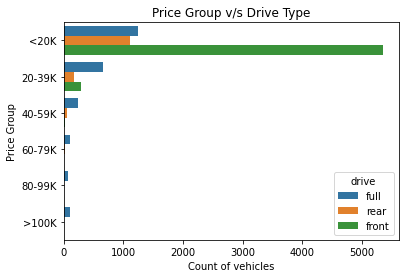

In [71]:
# drive type v/s price group
sns.countplot(y='price_group',data=cardata, hue='drive', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])
plt.title("Price Group v/s Drive Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

By this chart we can say that 
- The most cars sold in price range of __200 to 19999__ and majority of these are in __Front__  drive type. 
- The majority is __Full__ drive type in Cars sold at a price __20000 or above__.

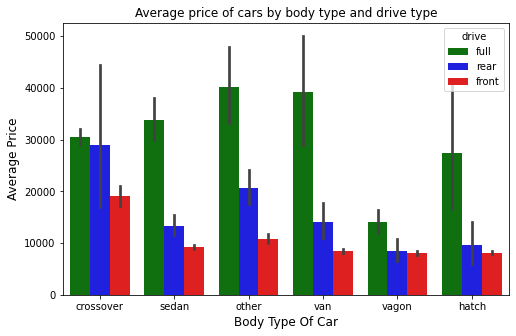

In [72]:
# Average price of vehicles by body type and drive type
fig, ax = plt.subplots(figsize=(8,5))
colors = ["green", "blue","red"]
sns.barplot(x="body", y="price",hue="drive", palette=colors, data=cardata)
ax.set_title("Average price of cars by body type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Body Type Of Car",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

By this chart we can say that __all body types__ of cars have __more average price__ for __full drive type__ cars compare to __other drive types__.

### Q 6. Does the engType have any impact on price of the car?

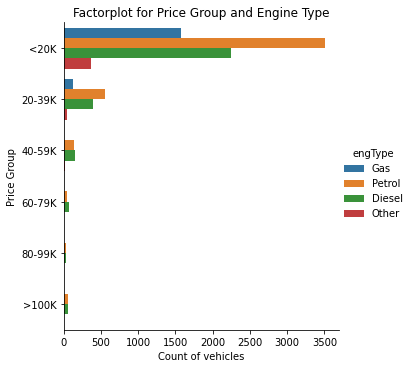

In [73]:
# Price group v/s engType
sns.factorplot(y='price_group', data=cardata, hue='engType', kind= 'count', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])   
plt.title('Factorplot for Price Group and Engine Type')
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

By this chart we can say that
- The most cars sold in price range of __200 to 19999__ and majority of these are in __Petrol__ engine type. 
- The majority is __Diesel__ engine type in Cars sold at a price __20000 or above__..

### Q 7. How does price relate to engine type (engType) and drive type of the car?

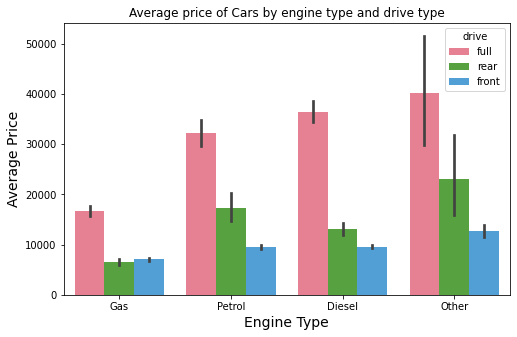

In [74]:
# barplot for price based on engine type and drive type
fig, ax = plt.subplots(figsize=(8,5))
colors = ["green", "blue","red"]
sns.barplot(x="engType", y="price",hue="drive", palette="husl",data=cardata)
ax.set_title("Average price of Cars by engine type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

By this chart we can say that the cars sold in __all engine type__ have __more average price__ for __full drive type__ cars compare to __other drive type__ cars.

### Q 8. Which engine volume (engV) cars sold the most ?

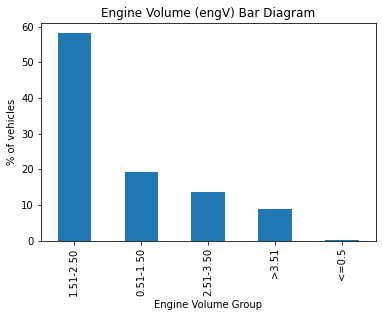

In [75]:
# grouping of engV  
(pd.cut(cardata['engV'],[0,0.51,1.51,2.51,3.51,100], 
        labels = ['<=0.5','0.51-1.50','1.51-2.50','2.51-3.50','>3.51']).value_counts() / len(cardata)*100).plot.bar()    
plt.title("Engine Volume (engV) Bar Diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Engine Volume Group');

By this chart we can say that below are the __top three categories__ of __Engine Volume (engV)__ cars sold.
- __Ist Category__   : > 1.5 & <= 2.5 (In this category approx __55%__ of cars are available)
- __IInd Category__  : > 0.5 & <= 1.5 (In this category approx __19%__ of cars are available)
- __IIIrd Category__ : > 2.5 & <= 3.5 (In this category approx __18%__ of cars are available)

Out of total cars sold, approx __92%__ cars fall in range of engine volume more than __1.5 CC to  3.5 CC__

(0.0, 6.0)

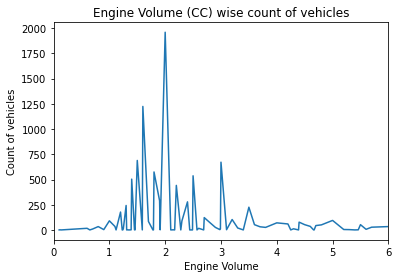

In [76]:
# engine volume wise count of vehicles
careng = cardata.loc[cardata['engV'] <= 6]
careng['engV'].value_counts().sort_index().plot.line()
plt.title("Engine Volume (CC) wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Engine Volume');
plt.xlim(0,6)

By this chart we can say that most of the cars sold have __2.0 CC__ engine volume followed by __1.5 CC__, there are very __few cars sold__ with engine volume __less than equal to 1.0 CC and greater than equal to 4.0 CC__.  

### Q 9. How does engine volume (engV) relate to mileage of the car?

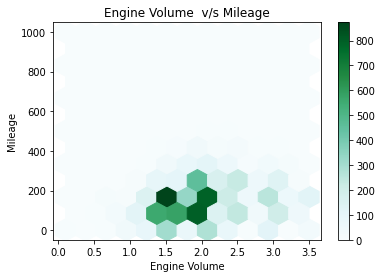

In [77]:
# engV v/s mileage
cardata[cardata['engV'] < 3.51].plot.hexbin(x='engV', y='mileage', sharex=False, gridsize=12)
plt.title("Engine Volume  v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Engine Volume');

By this chart we can say that most of the cars sold with __engine volume (engV)__ as 1.5 CC and __mileage__ as approx 200.

### Q 10. How does price is relate to mileage and Purchase year of the car?

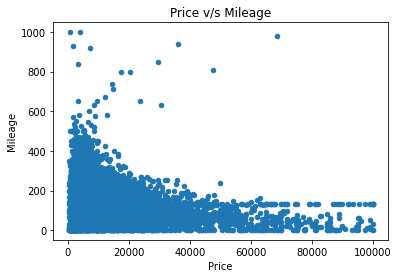

In [78]:
# price v/s mileage 
cardata[cardata['price'] < 100000 ].plot.scatter(x='price', y='mileage')
plt.title("Price v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Price');

By this chart we can say that __price__ and __mileage__ have __strongly negative correlation__ in sold car dataset , i.e. lower price segment has higher mileage and higher price segment has lower mileage. 

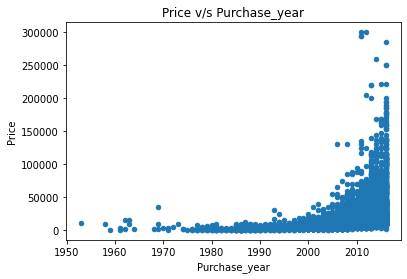

In [79]:
# price v/s Purchase_year
cardata[cardata['price'] <= 300000].plot.scatter(x='Purchase_year',y='price')
plt.title("Price v/s Purchase_year")
plt.ylabel('Price')
plt.xlabel('Purchase_year');

By this chart we can say that 
- Majority of the cars with __Purchase_year 2008 or later__ sold in __price 50000 or lower__. 
- All the cars with __Purchase_year 2010 or later__ sold in __price more than 50000__.
- All the cars with __Purchase_year before 2010__ sold in __price 50000 or lower__.

### Q 11. Which Purchase_year of cars sold the most and How revenue relation with Purchase year?

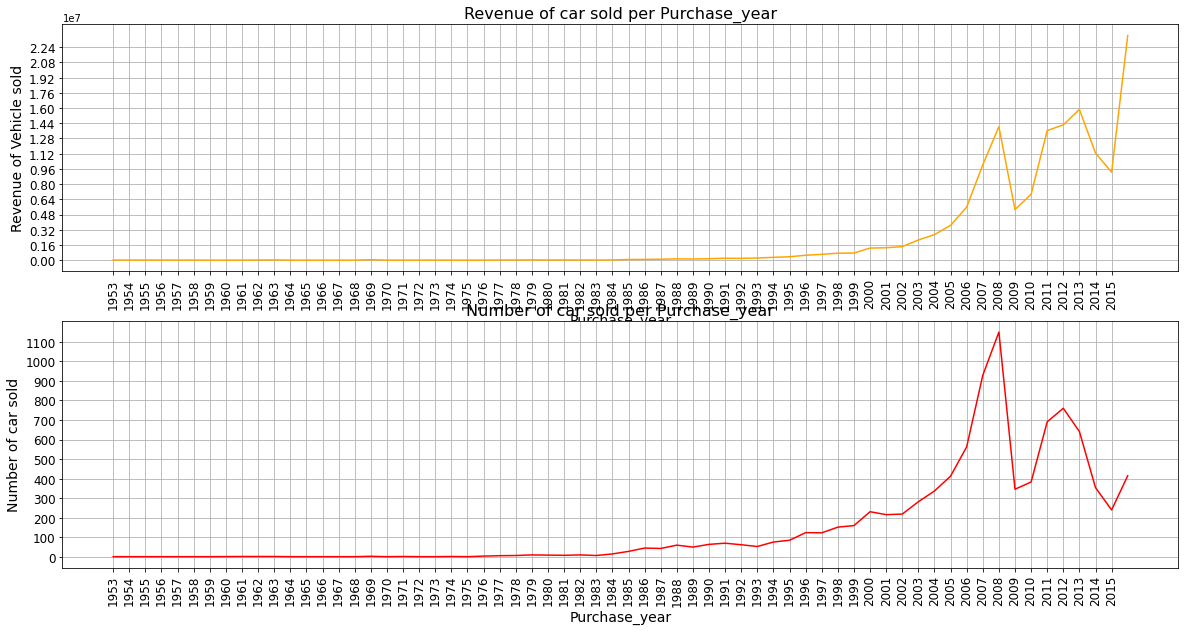

In [80]:
figure = plt.figure(figsize=[20, 10])

# Purchase_year wise count of vehicles
plt.subplot(2,1,1)
cardata.groupby(by=['Purchase_year'])['price'].sum().plot.line(color='orange')
plt.xticks(ticks=np.arange(1953, 2016),size=12, rotation=90)
plt.yticks(ticks=np.arange(0, 24000000, 1600000), size=12)
plt.xlabel(xlabel='Purchase_year', size=14)
plt.ylabel(ylabel='Revenue of Vehicle sold', size=14)
plt.title(label='Revenue of car sold per Purchase_year', size=16)
plt.grid(b=True)


plt.subplot(2,1,2,)
cardata['Purchase_year'].value_counts().sort_index().plot.line(color='red')
plt.xticks(ticks=np.arange(1953, 2016),size=12, rotation=90)
plt.yticks(ticks=np.arange(0, 1200, 100), size=12)
plt.xlabel(xlabel='Purchase_year', size=14)
plt.ylabel(ylabel='Number of car sold', size=14)
plt.title(label='Number of car sold per Purchase_year', size=16)
plt.grid(b=True)

By this chart we can say that, __Purchase_year 2008 and 2012__ cars are sold the most. 
After __Purchase_year 2008 and 2012__ though car sales not increses but revenue increses . It mean customer is moving towards Expensive Cars.

### Q 12. How does Purchase_year relate to registration?

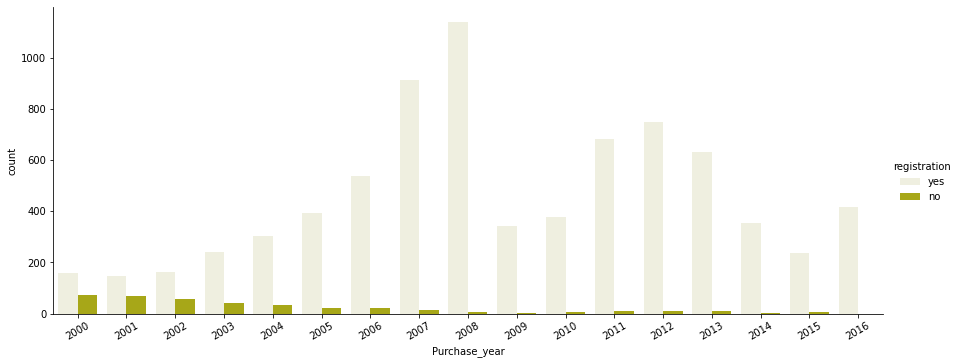

In [81]:
# Purchase_year v/s registration
cc = cardata.loc[cardata['Purchase_year'] >= 2000]

g = sns.factorplot('Purchase_year',data=cc,aspect=2.5, kind='count',hue='registration',color="y")
g.set_xticklabels(rotation=30)

By this chart we can say that, After Purchase_year 2008 there is high probability that car is registered

### Q 13. Correlation between various features of car data.

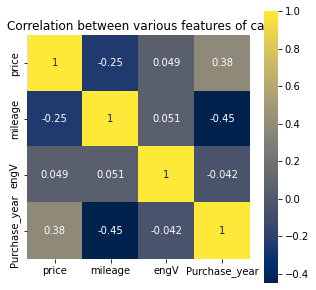

In [82]:
car_corr = cardata.corr()
car_corr
plt.figure(figsize=(5,5))
sns.heatmap(car_corr,vmax=1,square=True,annot=True, cmap='cividis')
plt.title("Correlation between various features of car")
plt.show()

By this heatmap we can say that;
- __price__ and __Purchase_year__ variables have __strong positive correlation__, i.e. latest Purchase_year cars have high  price and older Purchase_year cars have lower price.
- __price and engine volume (engV)__ have __mild positive correlation__.
- __engine volume (engV) and mileage__ also have some __mild positive correlation__, generally engine volume and mileage do not have positive correlation, but in our data most of the cars have engine volume in between 1.5 CC to 2.5 CC, due to that mileage and engine volume have mild positive correlation.
- __Purchase_year__ and __mileage__ variables have __strong negative correlation__, i.e. latest Purchase_year cars have high mileage and older Purchase_year cars have low mileage.
- __price and mileage__ have __negative correlation__, i.e. lower price cars have higher mileage and higher price cars have     lower mileage.
- __Purchase_year and engine volume (engV)__ also have some __negative correlation__.

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- In this dataset We have total 9463 observations after removing duplicate records.
- We observe that out of total cars sold, majority of the cars sold by __"Volkswagen"__, __"Mercedes-Benz"__ and __"BMW"__ brand.
- __"Sedan"__, __"Crossover"__ and __"Hetch"__ body types cars are the highest sold cars.
- __"Front" drive type__ segment cars are the highest sold cars, because most of the cars of this segment falls in lower price range.
- __"Front"__ wheel drive cars are th top most cars in all body type except in __"Crossover"__ body type. In __"Crossover"__ body type __"Full"__ wheel drive cars are leading.  
- __80%__ of total cars sold in the __price range of 200 to 20000__ with __body type as "Sedan"__, __drive type as "Front"__ and __engine type as "Petrol"__, because the middle class families preferred low price cars with Sedan body and Petrol engine type.
- __"Mercedes-Benz"__ is the leading brand in higher price segment cars.
- Majority of the __higher price range__ cars sold with __body type as "Crossover"__, __drive type as "Full"__ and __engine type as "Diesel"__.
- All __body segment__ of cars have __more average price__ for __"Full" drive type__ cars compare to other drive type cars. 
- All __engine types__ of cars have __more average price__ for __"Full" drive type__ cars compare to other drive type cars.
- Approx __55%__ of total cars sold have __engine volume in the range of 1.5 CC to 2.5 CC__.
- Most of the cars sold in __2.0 CC__ engine volume segment followed by __1.5 CC__, there are very __few cars sold below 1.0 CC and above 4.0 CC__
- We have also observed that __lower price segment__ car has __higher mileage__ and __higher price segment__ car has __lower mileage__.
- Majority of the cars with __Purchase year 2008 or later__ were __registered__ sold in __price of 50000 or lower__.
- Purchase year __2008__ and __2012__ cars are the highest sold cars.
- __Price__ has __positive correlation__ with __engine volume__ and __Purchase year__ and __negatively correlation__ with __mileage__.
- __Purchase year__ has __negative correlation__ with __mileage__ and __engine volume__.

<a name = Section92></a>
### **9.2 Actionable Insights**

- In order to purchase car **<= 20000** and to get Resale Value for the same,go for  Front wheel drive car with **Volkswagen/Mercedes/BMW,Sedan body and engV 2.0 CC and of Petrol type**
-For Higher Segment Purchase car **>= 50000** and to get Resale Value for the same, go for  **Full drive car with Mercedes, Crossover body and engV up to 3.5 CC and of Diesel type**.
- Majority of the cars with __Purchase year 2008 or later__ were __registered__ sold in __price of 50000 or lower__.
-After __Purchase_year 2008 and 2012__ though car sales not increses but revenue increses . It mean customer is moving towards Expensive Cars.
-It mean that there are **few brand car** which suffices customer requirment in the **price range of 20000 to 40000**
- Customer mostly buy **Full drive** car if budget is **more than 20000**


